## TASK 1: Prediction Using Supervised Machine Learning

AUTHOR : Anam Shad

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [29]:
data = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data = pd.read_csv(data)
print("Data imported successfully")
print(s_data)

Data imported successfully
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


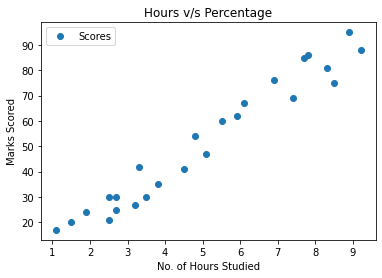

In [13]:
#Plotting the distributions of Scores
s_data.plot(x="Hours",y="Scores",style='o')
plt.title('Hours v/s Percentage')
plt.xlabel('No. of Hours Studied')
plt.ylabel('Marks Scored')
plt.show()

#From the above graph, It is clearly visible that there exists a linear relationship between no. of hours studied and the marks scored in exams
#Hence, We are going to use Simple linear regression model.

First, we will convert the data into attributes and labels( i.e, inputs and outputs), then 
Split the data into training sets and test sets, using Scikits Learn built in train_test_split() method


In [20]:
X= s_data.iloc[:,:-1].values
Y=s_data.iloc[:,1].values

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.2)


Training the Algorithm : 


In [37]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
print("Training Complete")

Training Complete


In [23]:
#Plotting the regression Line
line=regressor.coef_*X+regressor.intercept_

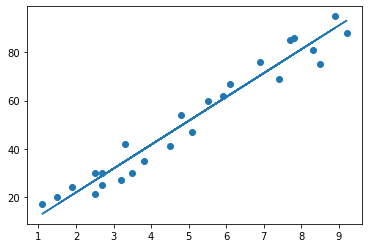

In [24]:
#Plotting for test data
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

# Making Predictions
Since the alorithm is now trained, So it's time to make some predictions

In [25]:
#testing data
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [26]:
#Predicting the score
Y_pred = regressor.predict(X_test) 
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [31]:
#Comparing Actual vs Predicted Score
df=pd.DataFrame({"Actual":Y_test,"Predicted":Y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [46]:
#Testing with some data
#if we want to predict the score of someone studying for 9.25 hours

hour=np.array(9.25).reshape(-1,1)
predictedvalue=regressor.predict(hour)
print("No. of hours studied=",hour)
print("predicted score=",predictedvalue)


No. of hours studied= [[9.25]]
predicted score= [93.69173249]


# Evaluating the preformance of model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [45]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002975
